<a href="https://colab.research.google.com/github/zay1996/GRE_laylalaisy/blob/master/gis_landcover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from osgeo import gdal
from google.colab import files
uploaded = files.upload()

Saving newcategorydata.tif to newcategorydata.tif


In [ ]:
from io import BytesIO
#uploaded=files.upload()
data1=gdal.Open("newcategorydata.tif")
data1

In [ ]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
#Those are the libaries we need

categorylist=['Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']

colorlist=['lightgreen','green','yellow','black','aqua']
cmap = colors.ListedColormap(['lightgreen','green','yellow','black','aqua'])
boundaries = [0, 1, 2, 3, 4, 5, 6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


i=1
values = np.unique(cdata[i].ravel())

fig, ax = plt.subplots(2,5,figsize=(20,8))

yearlist=np.arange(1986,2006,2).astype(str)

for ii in range(nb):
    im = ax.ravel()[ii].imshow(cdata[ii], interpolation='none',cmap=cmap,norm=norm)
    ax.ravel()[ii].axis('off')
    ax.ravel()[ii].set_title(yearlist[ii])
    # get the colors of the values, according to the 
    # colormap used by imshow
    #colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    if(ii==nb-1):
        patches = [mpatches.Patch(color=colorlist[i-1], label=categorylist[i-1]) for i in np.unique(cdata[cdata!=0])]
        # put those patched as legend-handles into the legend
        ax.ravel()[ii].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

        

NameError: ignored

In [ ]:
######### PLOT MODE LAND COVERS ########
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

dom=np.zeros((nl,ns))
for i in np.arange(nl):
    for j in np.arange(ns):
        a=np.unique(cdata[:,i,j],return_counts=True)
        c=a[0][a[1]==np.sort(a[1])[-1]]
        dom[i,j]=int(convert(c))

categorylist=['No Data','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']

colorlist=['white','lightgreen','green','yellow','black','aqua']
cmap = colors.ListedColormap(['white','lightgreen','green','yellow','black','aqua'])
boundaries = [0, 1, 2, 3, 4, 5,6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


#### Dominant Land Cover ######
from matplotlib_scalebar.scalebar import ScaleBar


#dom=np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=cdata)


i=1
values = np.unique(cdata[i].ravel())

fig, ax = plt.subplots(figsize=(10,6))

yearlist=np.arange(int(startyear),int(endyear),gap).astype(str)


im = ax.imshow(dom, interpolation='none',cmap=cmap,norm=norm)
ax.axis('off')
ax.set_title("Mode Land Cover Type")
patches = [mpatches.Patch(color=colorlist[i], label=categorylist[i]) for i in np.unique(cdata)]
# put those patched as legend-handles into the legend
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
scalebar = ScaleBar(30,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)


fig.savefig('C:\\GEOG 360 PROJECT\\graphs\\mode.jpg', bbox_inches='tight',dpi=300,format='jpg')


In [ ]:
nb=data1.RasterCount
ns=int(data1.RasterXSize)
nl=int(data1.RasterYSize)

dataar=data1.ReadAsArray().astype('byte')
cdata=dataar

#Categorical data
newarr = np.diff(cdata, axis=0)
incidents=np.count_nonzero(newarr,axis=0)

#writedata(FileName,incidents)
#plt.imshow(incidents,cmap='plasma')

countpixel=[]
#count pixels with number of changes
for y in range(nb):
    for i in np.unique(incidents):
        #countpixel.append(np.sum(binarydata[y]==i))
        countpixel.append(np.sum(cdata[y]==i))
        
changemap=newarr!= 0
changemap=changemap.astype(int)        
        

def convert(list): 
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = str("".join(s)) 
      
    return(res) 

unique_=np.zeros((nl,ns)).astype(str)
# Driver code for
for i in range(nl):
    for j in range(ns):
        #a = binarydata[:,i,j].tolist()
        a = changemap[:,i,j].tolist()
        unique_[i,j]=convert(a)
            

np.size(np.unique(unique_))
np.unique(unique_).astype(str)

startyear='1986'
endyear='2004'
gap=2

#plot incidents
plt.imshow(incidents)

AttributeError: ignored

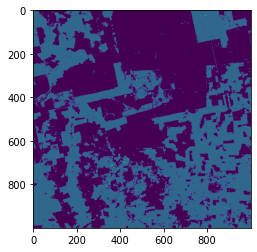

In [ ]:
map_=np.zeros((nl,ns)).astype('byte')
map_[incidents==0]=0
map_[incidents==1]=1

states=np.zeros((nl,ns))
## count unique elements
for i in range(nl):
    for j in range(ns):
        states[i][j]=len(np.unique(cdata[:,i,j]))
        
map_[np.logical_and(incidents>=2,states==2)]=2
map_[np.logical_and(incidents>=2,states>2)]=3

#plot states
plt.imshow(states)

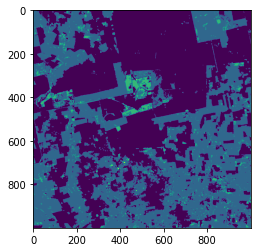

In [ ]:
#plot combination
plt.imshow(map_)

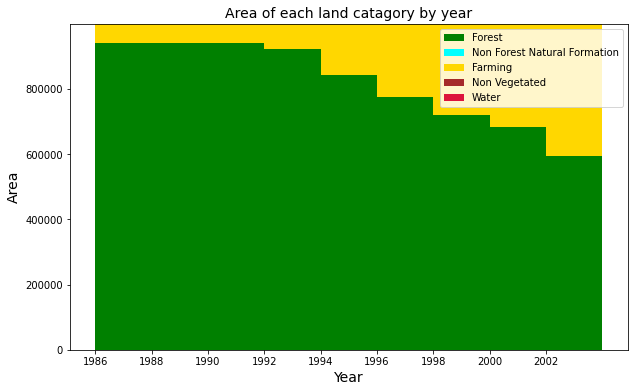

In [ ]:
### AREA ####

#for each time interval
#for each categroy

dfpres=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfpres['year']=np.arange(int(startyear),int(endyear),gap)



for c in np.unique(cdata[cdata!=0]):
    pres=[]

    for t in range(nb-1):
        pres.append(np.sum(cdata[t]==c))
    
    dfpres.iloc[:,c]=pres
        


### PLOT LOSS AND GAIN ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
xlabels=dfpres['year'].astype('str')

width=1.0
bargheight=dfpres.iloc[:,1:].cumsum(axis=1)


p=[]
p.append(ax.bar(xlabels,dfpres.iloc[:,1],width,color='green',align='edge'))


colors=['aqua','gold','brown','crimson']
for i in np.unique(cdata[cdata!=0])[1:]:
    p.append(ax.bar(xlabels,dfpres.iloc[:,i],width,bottom=bargheight.iloc[:,i-2],color=colors[i-2],align='edge'))

ax.set_title('Area of each land catagory by year',fontsize=14)
ax.set_ylabel('Area',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0]), ('Forest','Non Forest Natural Formation','Farming','Non Vegetated','Water',))    

ax.axhline(y=0,color='0',linewidth=0.5)
plt.show()

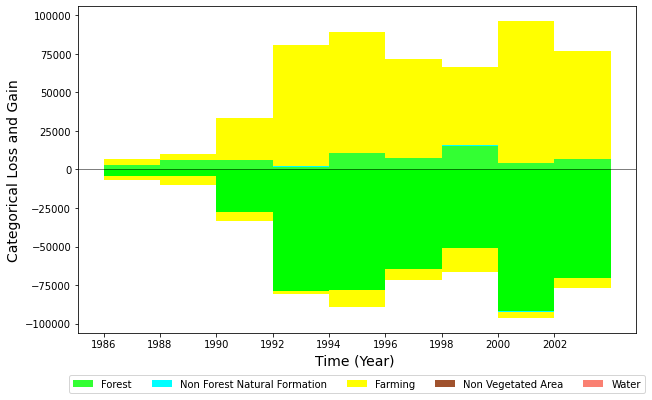

In [ ]:
### LOSS AND GAIN ####

#for each time interval
#for each categroy
dfloss=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfloss['year']=np.arange(int(startyear),int(endyear),gap)

dfgain=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
dfgain['year']=np.arange(int(startyear),int(endyear),gap)

for c in np.unique(cdata[cdata!=0]):
    loss=[]
    gain=[]
    for t in range(nb-1):
        #loss for category c
        loss.append(np.sum(np.logical_and(cdata[t]==c,cdata[t+1]!=c)))
        lossind=np.where(np.logical_and(cdata[t]==c,cdata[t+1]!=c))

        gain.append(np.sum(np.logical_and(cdata[t]!=c,cdata[t+1]==c)))
        gainind=np.where(np.logical_and(cdata[t]!=c,cdata[t+1]==c))

    dfloss.iloc[:,c]=loss
    dfgain.iloc[:,c]=gain

    
### PLOT LOSS AND GAIN ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
xlabels=dfgain['year'].astype('str')

width=1.0
bargheight=dfgain.iloc[:,1:].cumsum(axis=1)
barlheight=dfloss.iloc[:,1:].cumsum(axis=1)

p=[]
p.append(ax.bar(xlabels,dfgain.iloc[:,1],width,color='lime',alpha=0.8,align='edge'))

x=[]
x.append(ax.bar(xlabels,-dfloss.iloc[:,1],width,color='lime',align='edge'))


colors=['cyan','yellow','sienna','salmon']
for i in np.unique(cdata[cdata!=0])[1:]:
    p.append(ax.bar(xlabels,dfgain.iloc[:,i],width,bottom=bargheight.iloc[:,i-2],color=colors[i-2],align='edge'))
    x.append(ax.bar(xlabels,-dfloss.iloc[:,i],width,bottom=-barlheight.iloc[:,i-2],color=colors[i-2],align='edge'))

ax.set_ylabel('Categorical Loss and Gain',fontsize=14)
ax.set_xlabel('Time (Year) ',fontsize=14)
plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0]), ('Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'),ncol=5, bbox_to_anchor=(0.5, -0.20),loc='lower center')    

ax.axhline(y=0,color='0',linewidth=0.5)
plt.show()

#IF you want to store the grap locally, try these code

# fig.savefig('D:\\"your address"\\loss_and_gain.jpg', dpi=300,format='jpg')